In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Binary Classifier by Perceptron Learning 

In [2]:
class Perceptron:
    
    def __init__(self, max_iters=100, eta=0.5):
        self.max_iters = max_iters 
        self.eta = eta 

    def set_trainData(self, X_train, y_train): 
        self.X_ = X_train 
        d = np.copy(y_train)
        d[d<=0] = 0 
        self.y_ = d
        return self 
    
    def fit(self):
        self.w_ = np.zeros(1 + self.X_.shape[1])
        self.errors_ = []

        for _ in range(self.max_iters):
            error = 0
            delta_wj = np.copy(self.w_)
            
            # Shuffle the training data
            indices = np.arange(len(self.X_))
            np.random.shuffle(indices)
            X_shuffled = self.X_[indices]
            y_shuffled = self.y_[indices]
            
            for xj, di in zip(X_shuffled, y_shuffled):
                update = self.eta * (di - self.predict(xj))
                self.w_[0] += update 
                self.w_[1:] += update * xj 
                error += np.abs(update / self.eta)
            self.errors_.append(error)

        return self

    def weights(self):
        return self.w_ 
    
    def errors(self):
        return self.errors_ 
    
    def predict(self, X):
        a=np.dot(X, self.w_[1:]) + self.w_[0] 
        return np.where(a >= 0, 1, 0) 
    


In [3]:
class LogisticRegression:
    
    def __init__(self, max_iters=100, eta=0.5):
        self.max_iters = max_iters 
        self.eta = eta 

    def set_trainData(self, X_train, y_train): 
        self.X_ = X_train 
        d = np.copy(y_train)
        d[d<=0] = 0 
        self.y_ = d
        return self 
    
    def fit(self, beta, threshold=None):
        self.w_ = np.zeros(1 + self.X_.shape[1])
        self.errors_ = []

        for _ in range(self.max_iters):
            error = 0
            delta_wj = np.copy(self.w_)
            
            # Shuffle the training data
            indices = np.arange(len(self.X_))
            np.random.shuffle(indices)
            X_shuffled = self.X_[indices]
            y_shuffled = self.y_[indices]
            
            for xj, di in zip(X_shuffled, y_shuffled):
                update = self.eta * (di - self.predict(xj, beta=beta, threshold=threshold))
                self.w_[0] += update 
                self.w_[1:] += update * xj 
                error += np.abs(update / self.eta)
            self.errors_.append(error)

        return self

    def weights(self):
        return self.w_ 
    
    def errors(self):
        return self.errors_ 
    
    def predict(self, X, beta, threshold=None):
        a = np.dot(X, self.w_[1:]) + self.w_[0]
        z = 1 / (1 + np.exp(-beta * a))
        if threshold is not None:
            return np.where(z >= threshold, 1, 0)
        else:
            return z


## Synthetic Dataset

X.shape: (100, 2)


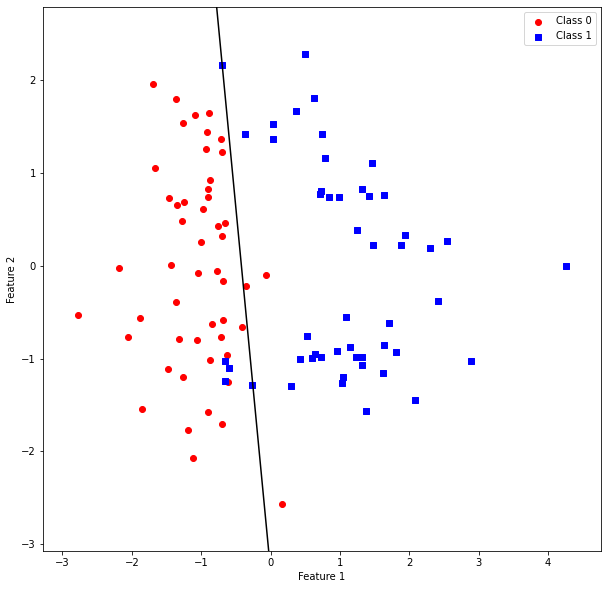

In [4]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

p1 = Perceptron(max_iters=1000, eta=0.01)
p1.set_trainData(X_train, y_train)
w= p1.fit().weights()


# Decision line 
line_x = np.linspace(np.min(X[:, 0])-5, np.max(X[:,0]+5), 1000)
line_y = -w[1]*line_x/w[2] - w[0]/w[2] 

# Define marker and color for each class
markers = ['o', 's']  # Marker types for classes 0 and 1
colors = ['blue', 'red']  # Colors for classes 0 and 1

plt.figure(figsize=(10,10))
# Plot the scatter points
plt.scatter(X[y == 0, 0], X[y == 0, 1], marker=markers[0], color=colors[0])
plt.scatter(X[y == 1, 0], X[y == 1, 1], marker=markers[1], color=colors[1]) 

plt.legend(['Class 0', 'Class 1'], loc='best')

plt.plot(line_x,line_y, c='k')

plt.ylabel('Feature 2')
plt.xlabel('Feature 1')
plt.xlim(np.min(X[:, 0])-0.5, np.max(X[:, 0])+0.5)
plt.ylim(np.min(X[:, 1])-0.5, np.max(X[:, 1])+0.5)
print('X.shape: {}'.format(X.shape))

X.shape: (100, 2)


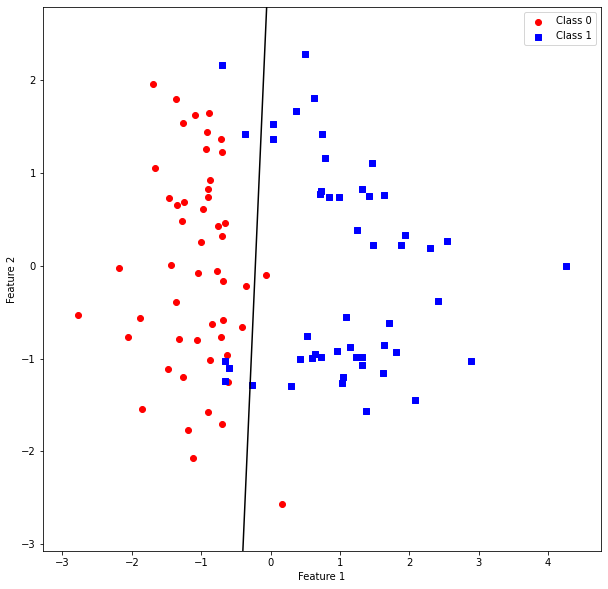

In [5]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

p1 = Perceptron(max_iters=100, eta=0.01)
p1.set_trainData(X_train, y_train)


w1= p1.fit().weights()


# Decision line, Perceptron Model
line_x1 = np.linspace(np.min(X[:, 0])-5, np.max(X[:,0]+5), 1000)
line_y1 = -w1[1]*line_x/w1[2] - w1[0]/w1[2] 

# Define marker and color for each class
markers = ['o', 's']  # Marker types for classes 0 and 1
colors = ['blue', 'red']  # Colors for classes 0 and 1

plt.figure(figsize=(10,10))
# Plot the scatter points
plt.scatter(X[y == 0, 0], X[y == 0, 1], marker=markers[0], color=colors[0])
plt.scatter(X[y == 1, 0], X[y == 1, 1], marker=markers[1], color=colors[1]) 

plt.legend(['Class 0', 'Class 1'], loc='best')

plt.plot(line_x1,line_y1, c='k')


plt.ylabel('Feature 2')
plt.xlabel('Feature 1')
plt.xlim(np.min(X[:, 0])-0.5, np.max(X[:, 0])+0.5)
plt.ylim(np.min(X[:, 1])-0.5, np.max(X[:, 1])+0.5)
print('X.shape: {}'.format(X.shape))

In [6]:
1/(1+np.exp(-1*(-0.602)))

0.3538862587023754

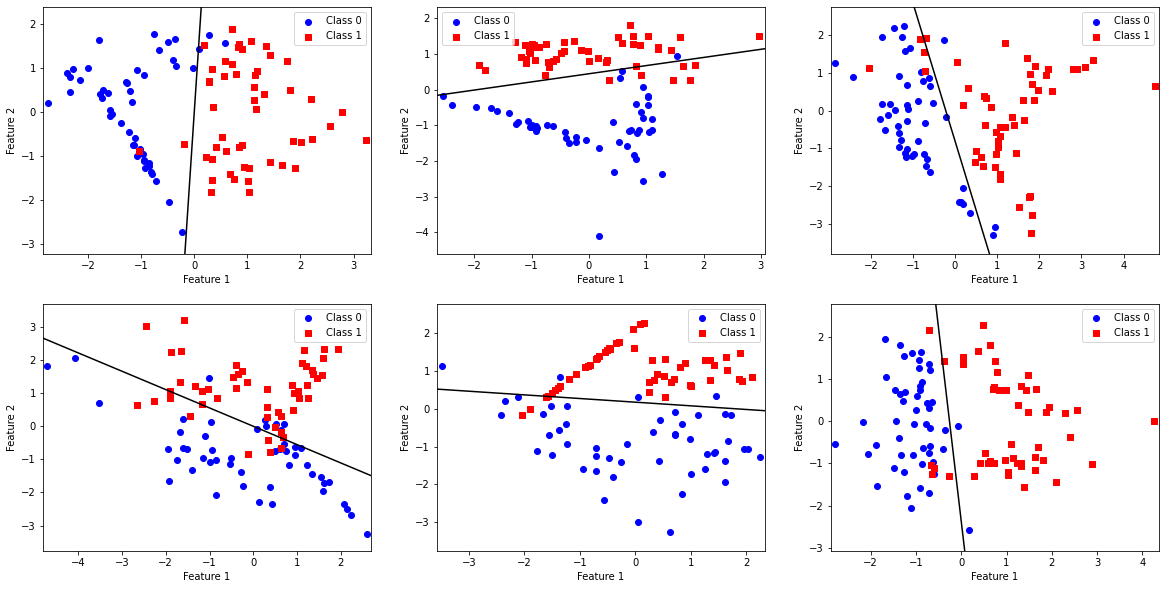

In [17]:
N=6
fig, ax = plt.subplots(2,3, figsize=(20,10))
ax = ax.flatten()
for i in range(N):
    X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=i+5)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    #Fit a perceptron linear classifier in the data
    p = Perceptron(max_iters=100, eta=0.05)
    p.set_trainData(X_train,y_train)
    W= p.fit().weights()

    # Decision line 
    line_x = np.linspace(np.min(X[:, 0])-5, np.max(X[:,0]+5), 1000)
    line_y = -W[1]*line_x/W[2] - W[0]/W[2] 

    # Define marker and color for each class
    markers = ['o', 's']  # Marker types for classes 0 and 1
    colors = ['blue', 'red']  # Colors for classes 0 and 1

    # Plot the scatter points
    ax[i].scatter(X[y == 0, 0], X[y == 0, 1], marker=markers[0], color=colors[0])
    ax[i].scatter(X[y == 1, 0], X[y == 1, 1], marker=markers[1], color=colors[1]) 

    ax[i].legend(['Class 0', 'Class 1'], loc='best')

    # Plot decision line
    ax[i].plot(line_x,line_y, c='k')


    ax[i].set_xlabel('Feature 1')
    ax[i].set_ylabel('Feature 2')
    ax[i].set_xlim(np.min(X[:, 0])-0.1, np.max(X[:, 0])+0.1)
    ax[i].set_ylim(np.min(X[:, 1])-0.5, np.max(X[:, 1])+0.5)
    # print('X.shape: {}'.format(X.shape))
    plt.savefig('dataset1_perceptron.png', dpi=300)

## Breast Cancer Dataset

In [6]:
from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [9]:
print("Shape of cancer data: {}".format(cancer.data.shape))
print("Sample counts per class:\n{}".format( {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Shape of cancer data: (569, 30)
Sample counts per class:
{'malignant': 212, 'benign': 357}


In [10]:
np.sum(cancer.target)

357

In [11]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Accuracy on training set: 0.977
Accuracy on test set: 0.944


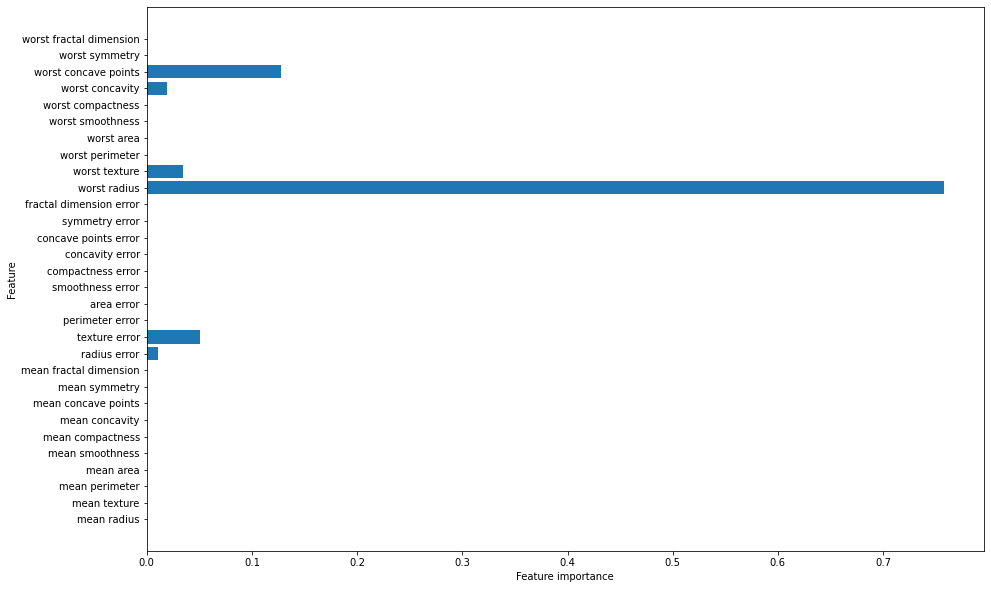

In [7]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer() 
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(max_depth =3, random_state=0) 
tree.fit(X_train, y_train) 
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))
def plot_feature_importances_cancer(model): 
    n_features = cancer.data.shape[1] 
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), cancer.feature_names) 
    plt.xlabel("Feature importance") 
    plt.ylabel("Feature")
plt.figure(figsize=(15,10))
plot_feature_importances_cancer(tree)

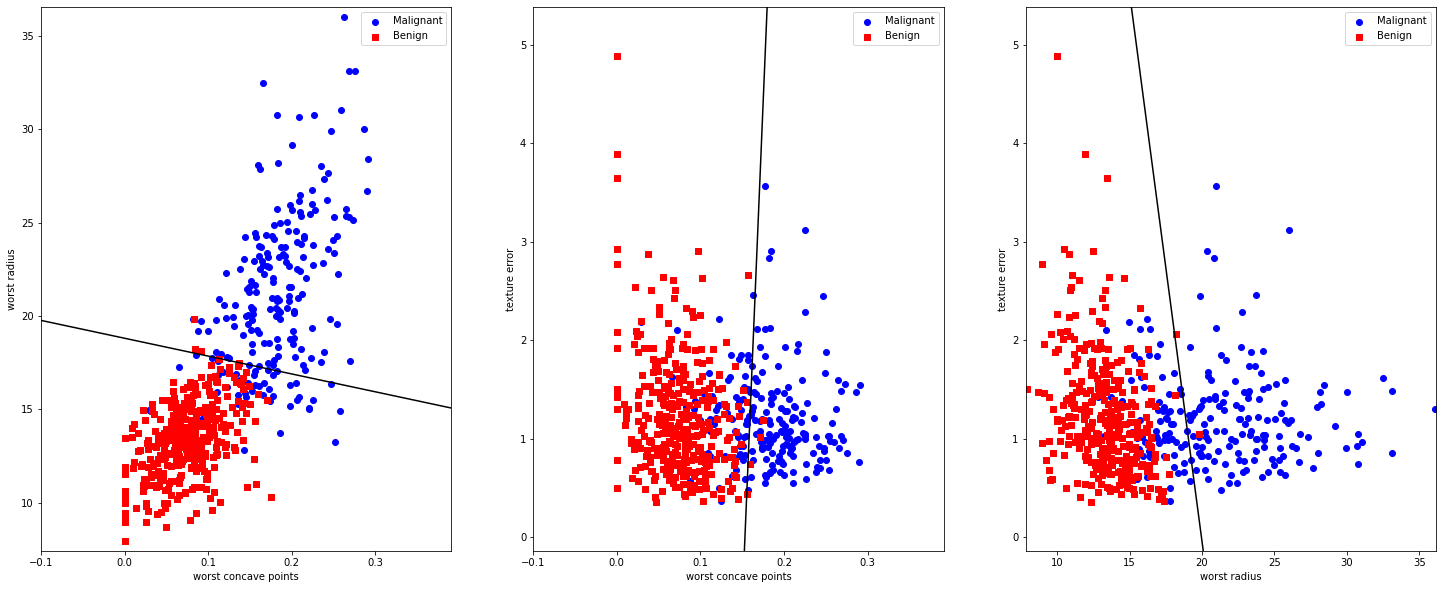

In [19]:
fig, ax = plt.subplots(1,3, figsize=(25,10))
ax = ax.flatten()
combs = [-3, -10, -19]
combs = [[-3, -10], [-3,-19], [-10,-19]]
for i in range(len(combs)):
    X,y = cancer.data[:, combs[i]], cancer.target 

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

    #Fit a perceptron linear classifier in the data
    p = Perceptron(max_iters=300, eta=0.01).set_trainData(X_train,y_train)
    W= p.fit().weights()
    
    # Decision line 
    line_x = np.linspace(np.min(X[:, 0])-5, np.max(X[:,0])+5, 1000)
    line_y = -W[1]*line_x/W[2] - W[0]/W[2] 

    # Define marker and color for each class
    markers = ['o', 's']  # Marker types for classes 0 and 1
    colors = ['blue', 'red']  # Colors for classes 0 and 1

    # Plot the scatter points
    ax[i].scatter(X[y == 0, 0], X[y == 0, 1], marker=markers[0], color=colors[0])
    ax[i].scatter(X[y == 1, 0], X[y == 1, 1], marker=markers[1], color=colors[1]) 

    ax[i].legend(['Malignant', 'Benign'], loc='best')

    # Plot decision line
    ax[i].plot(line_x,line_y, c='k')
    ax[i].set_xlim(np.min(X[:, 0])-0.1, np.max(X[:, 0])+0.1)
    ax[i].set_ylim(np.min(X[:, 1])-0.5, np.max(X[:, 1])+0.5)
    ax[i].set_xlabel(cancer.feature_names[combs[i][0]])
    ax[i].set_ylabel(cancer.feature_names[combs[i][1]])
    plt.savefig('dataset2_perceptron.png')

X.shape: (569, 2)


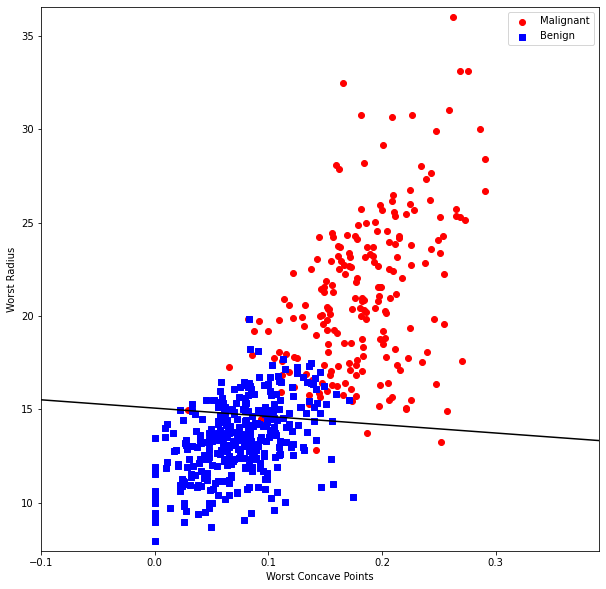

In [14]:
X,y = cancer.data[:, [-3,-10]], cancer.target 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

#Fit a perceptron linear classifier in the data
p2 = Perceptron(max_iters=100, eta=0.01)
p2.set_trainData(X_train,y_train)
W= p2.fit().weights()

# Decision line 
line_x = np.linspace(np.min(X[:, 0])-5, np.max(X[:,0]+5), 1000)
line_y = -W[1]*line_x/W[2] - W[0]/W[2] 

# Define marker and color for each class
markers = ['o', 's']  # Marker types for classes 0 and 1
colors = ['red', 'blue']  # Colors for classes 0 and 1

plt.figure(figsize=(10,10))


# Plot the scatter points
plt.scatter(X[y == 0, 0], X[y == 0, 1], marker=markers[0], color=colors[0])
plt.scatter(X[y == 1, 0], X[y == 1, 1], marker=markers[1], color=colors[1]) 

plt.legend(['Malignant', 'Benign'], loc='best')

# Plot decision line
plt.plot(line_x,line_y, c='k')


plt.xlabel('Worst Concave Points')
plt.ylabel('Worst Radius')
plt.xlim(np.min(X[:, 0])-0.1, np.max(X[:, 0])+0.1)
plt.ylim(np.min(X[:, 1])-0.5, np.max(X[:, 1])+0.5)
print('X.shape: {}'.format(X.shape))

## Iris Dataset

In [11]:
from sklearn.datasets import load_iris
iris = load_iris() 

In [12]:
print("Shape of iris data: {}".format(iris.data.shape))
print("Sample counts per class:\n{}".format( {n: v for n, v in zip(iris.target_names, np.bincount(iris.target))})) 
print("Feature names:\n{}".format(iris.feature_names))

Shape of iris data: (150, 4)
Sample counts per class:
{'setosa': 50, 'versicolor': 50, 'virginica': 50}
Feature names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


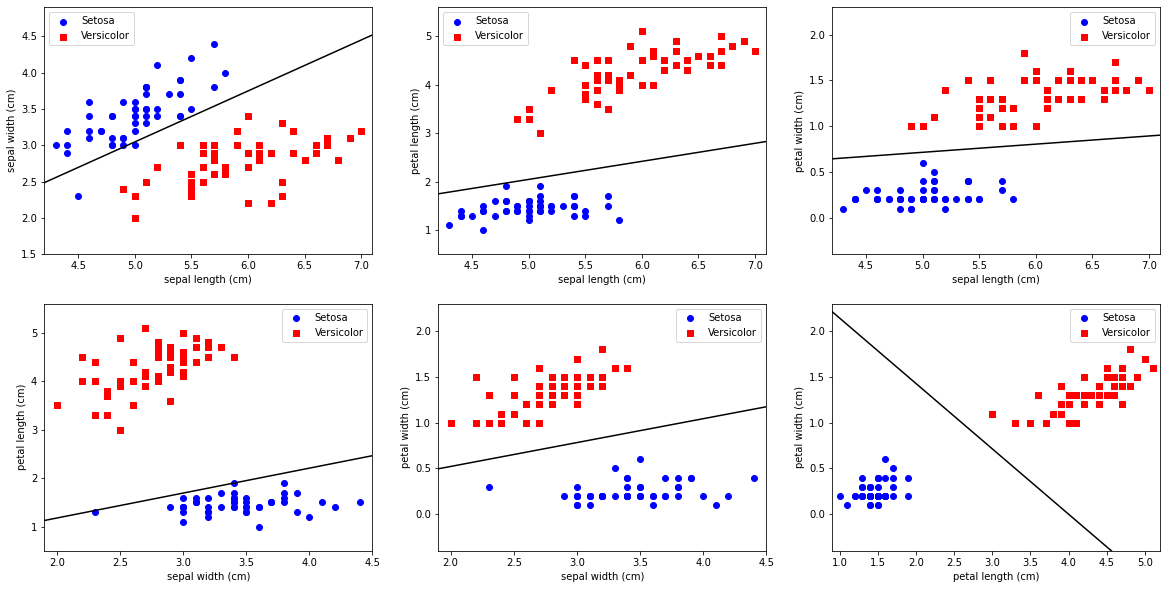

In [18]:
iris = load_iris() 
fig, ax = plt.subplots(2,3, figsize=(20,10))
ax = ax.flatten()
combs = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]
for i in range(len(combs)):
    
    # Filter the dataset to include only two classes (e.g., classes 0 and 1)
    class_filter = np.logical_or(iris.target == 0, iris.target == 1)
    X = iris.data[class_filter][:,combs[i]]
    y = iris.target[class_filter]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

    #Fit a perceptron linear classifier in the data
    p = Perceptron(max_iters=100, eta=0.05).set_trainData(X_train,y_train)
    W= p.fit().weights()
    
    # Decision line 
    line_x = np.linspace(np.min(X[:, 0])-5, np.max(X[:,0])+5, 1000)
    line_y = -W[1]*line_x/W[2] - W[0]/W[2] 

    # Define marker and color for each class
    markers = ['o', 's']  # Marker types for classes 0 and 1
    colors = ['blue', 'red']  # Colors for classes 0 and 1

    # Plot the scatter points
    ax[i].scatter(X[y == 0, 0], X[y == 0, 1], marker=markers[0], color=colors[0])
    ax[i].scatter(X[y == 1, 0], X[y == 1, 1], marker=markers[1], color=colors[1]) 
    ax[i].legend(['Setosa', 'Versicolor'], loc='best')

    # Plot decision line
    ax[i].plot(line_x,line_y, c='k')
    ax[i].set_xlim(np.min(X[:, 0])-0.1, np.max(X[:, 0])+0.1)
    ax[i].set_ylim(np.min(X[:, 1])-0.5, np.max(X[:, 1])+0.5)
    ax[i].set_xlabel(iris.feature_names[combs[i][0]])
    ax[i].set_ylabel(iris.feature_names[combs[i][1]])
    plt.savefig('dataset3_perceptron.png')

# Abalone 

In [18]:
import os 
# Get the current working directory
current_dir = os.getcwd()

# Define the path to the separate directory
separate_dir = os.path.join(current_dir, r'C:\Users\Ron\Documents\ML Datasets')

# Change the current directory to the separate directory
os.chdir(separate_dir)

abalone = pd.read_csv('abalone.csv')
abalone = abalone[abalone['Type']!='I']
abalone 

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [19]:
code = {'M':1, 'F':-1}
abalone['Type'] = abalone['Type'].replace(code)


In [20]:
np.shape(np.array(abalone.iloc[:,1:])) 

(2835, 8)

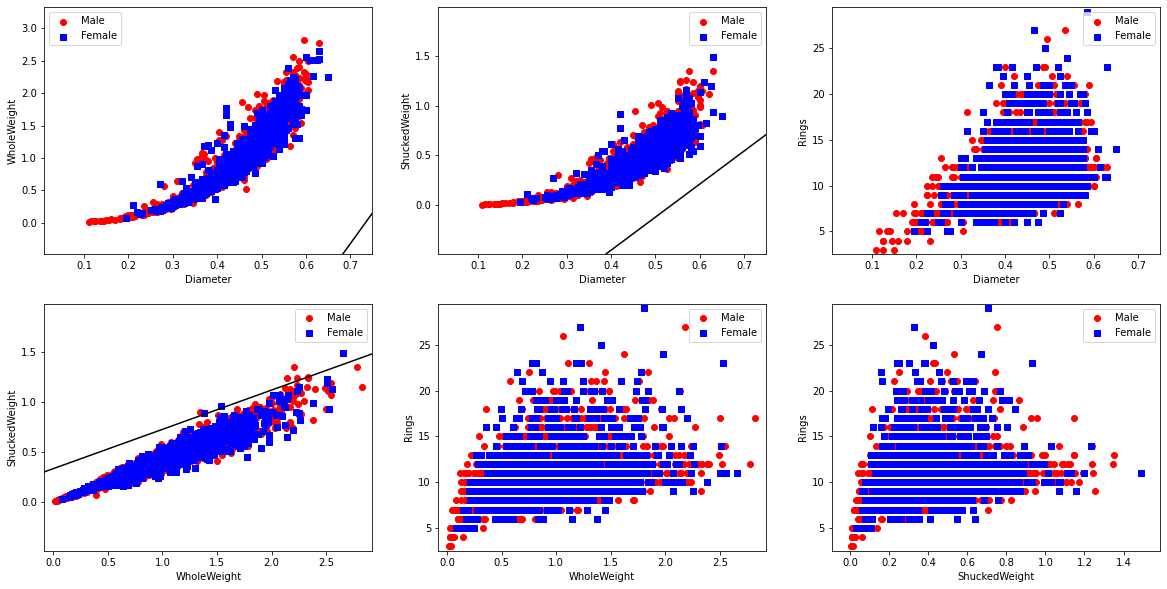

In [21]:
iris = load_iris() 
fig, ax = plt.subplots(2,3, figsize=(20,10))
ax = ax.flatten()
[1,3,4,7]
combs = [[1,3], [1,4], [1,7], [3,4], [3,7], [4,7]]
col_names = abalone.iloc[:,1:].columns.tolist()
for i in range(len(combs)):
    X, y = np.array(abalone.iloc[:,1:])[:, combs[i]], np.array(abalone['Type'])

    # Filter the dataset to include only two classes (e.g., classes 0 and 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

    #Fit a perceptron linear classifier in the data
    p = Perceptron(max_iters=1, eta=0.01).set_trainData(X_train,y_train)
    W= p.fit().weights()
    
    # Decision line 
    line_x = np.linspace(np.min(X[:, 0])-5, np.max(X[:,0])+5, 1000)
    line_y = -W[1]*line_x/W[2] - W[0]/W[2] 

    # Define marker and color for each class
    markers = ['o', 's']  # Marker types for classes 0 and 1
    colors = ['red', 'blue']  # Colors for classes 0 and 1

    # Plot the scatter points
    ax[i].scatter(X[y == 1, 0], X[y == 1, 1], marker=markers[0], color=colors[0])
    ax[i].scatter(X[y == -1, 0], X[y == -1, 1], marker=markers[1], color=colors[1]) 

    ax[i].legend(['Male', 'Female'], loc='best')

    # Plot decision line
    ax[i].plot(line_x,line_y, c='k')
    ax[i].set_xlim(np.min(X[:, 0])-0.1, np.max(X[:, 0])+0.1)
    ax[i].set_ylim(np.min(X[:, 1])-0.5, np.max(X[:, 1])+0.5)


    ax[i].set_xlabel(col_names[combs[i][0]])
    ax[i].set_ylabel(col_names[combs[i][1]])

Accuracy on training set: 0.553
Accuracy on test set: 0.563


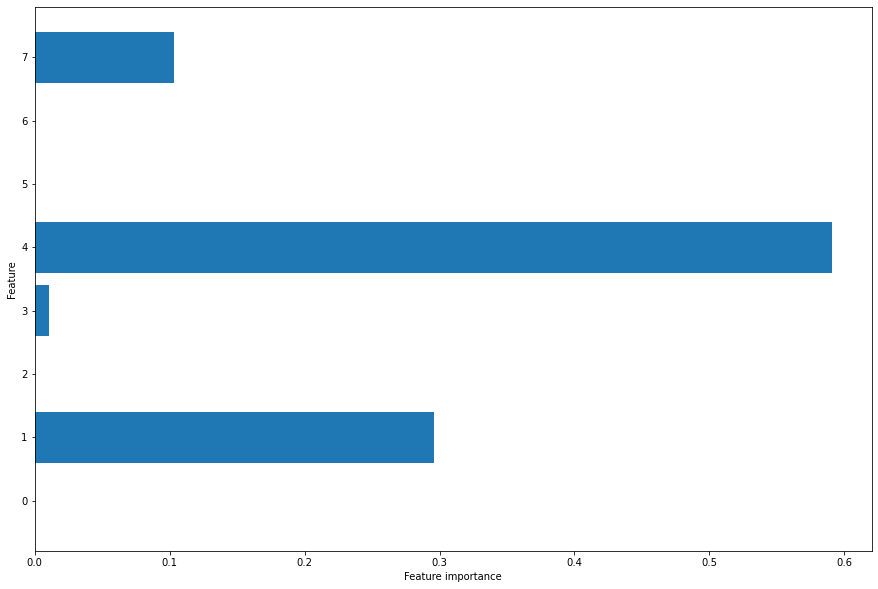

In [22]:
X, y = np.array(abalone.iloc[:,1:]), np.array(abalone['Type'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)
tree = DecisionTreeClassifier(max_depth =3, random_state=0) 
tree.fit(X_train, y_train) 
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))
def plot_feature_importances_cancer(model): 
    n_features = np.shape(X)[1]
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), ) 
    plt.xlabel("Feature importance") 
    plt.ylabel("Feature")
plt.figure(figsize=(15,10))
plot_feature_importances_cancer(tree)

# Logistic Regression


Text(0.5, 0, 'Feature 1')

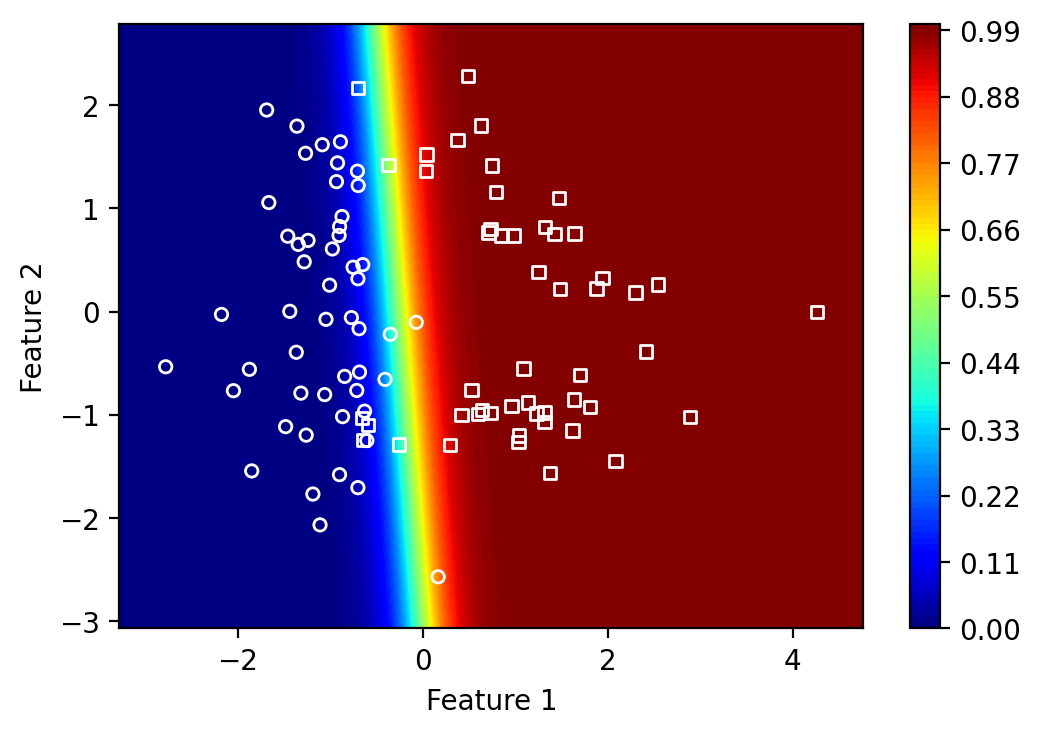

In [23]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

x_g = np.linspace(np.min(X[:, 0])-0.5, np.max(X[:, 0])+0.5, 100)
y_g = np.linspace(np.min(X[:, 1])-0.5, np.max(X[:, 1])+0.5, 100)
X_grid, Y_grid = np.meshgrid(x_g, y_g, indexing='ij') 

beta=1
p2 = LogisticRegression(max_iters=1000, eta=0.01)
p2.set_trainData(X_train, y_train)
w2= p2.fit(beta=beta, threshold=None).weights()

a = X_grid*p2.weights()[1] +  Y_grid*p2.weights()[2] + p2.weights()[0]
z= 1 / (1 + np.exp(-beta * a)) 

fig,ax = plt.subplots(dpi=200)
contour = ax.contourf(X_grid,Y_grid, z, 100, cmap='jet')
cbar = fig.colorbar(contour)

# Define marker and color for each class
markers = ['o', 's']  # Marker types for classes 0 and 1

ax.scatter(X[y == 0, 0], X[y == 0, 1], marker=markers[0], s=20, facecolors='none', edgecolors='w')
ax.scatter(X[y == 1, 0], X[y == 1, 1], marker=markers[1], s=20, facecolors='none', edgecolors='w') 
ax.set_xlim(np.min(X[:, 0])-0.5, np.max(X[:, 0])+0.5)
ax.set_ylim(np.min(X[:, 1])-0.5, np.max(X[:, 1])+0.5)
ax.set_ylabel('Feature 2')
ax.set_xlabel('Feature 1')

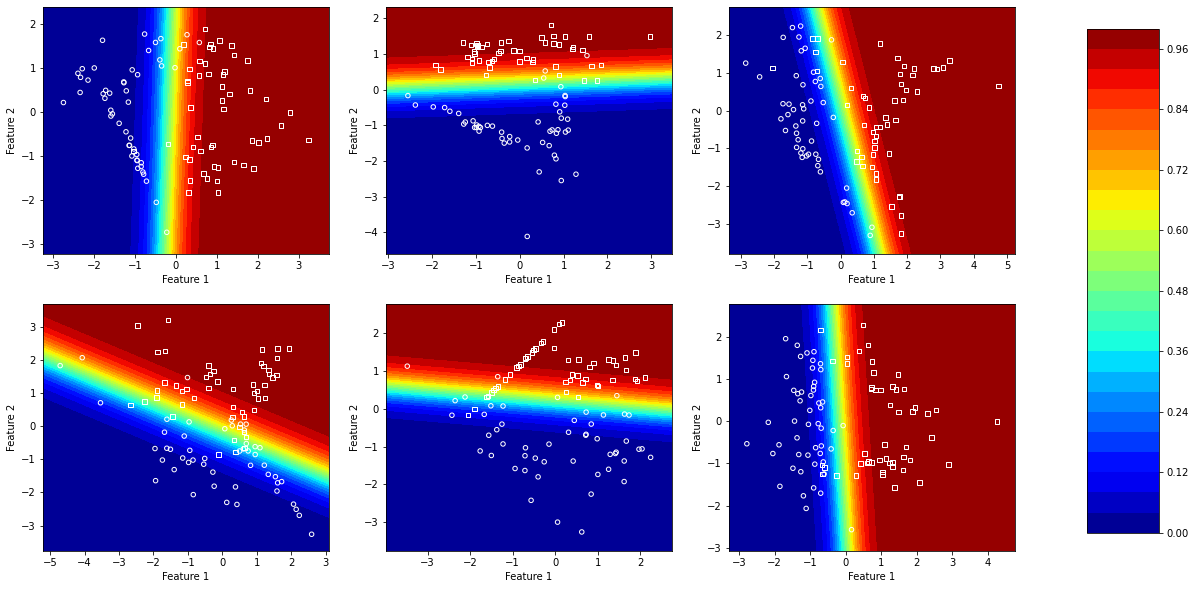

In [16]:
N=6
fig, ax = plt.subplots(2,3, figsize=(20,10))
ax = ax.flatten()
for i in range(N):
    X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=i+5)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    x_g = np.linspace(np.min(X[:, 0])-0.5, np.max(X[:, 0])+0.5, 100)
    y_g = np.linspace(np.min(X[:, 1])-0.5, np.max(X[:, 1])+0.5, 100)
    X_grid, Y_grid = np.meshgrid(x_g, y_g, indexing='ij') 

    beta=1
    p2 = LogisticRegression(max_iters=100, eta=0.01)
    p2.set_trainData(X_train, y_train)
    w2= p2.fit(beta=beta, threshold=None).weights()

    a = X_grid*p2.weights()[1] +  Y_grid*p2.weights()[2] + p2.weights()[0]
    z= 1 / (1 + np.exp(-beta * a)) 

    contour = ax[i].contourf(X_grid,Y_grid, z, 30, cmap='jet')

    # Define marker and color for each class
    markers = ['o', 's']  # Marker types for classes 0 and 1

    ax[i].scatter(X[y == 0, 0], X[y == 0, 1], marker=markers[0], s=20, facecolors='none', edgecolors='w')
    ax[i].scatter(X[y == 1, 0], X[y == 1, 1], marker=markers[1], s=20, facecolors='none', edgecolors='w') 
    ax[i].set_xlim(np.min(X[:, 0])-0.5, np.max(X[:, 0])+0.5)
    ax[i].set_ylim(np.min(X[:, 1])-0.5, np.max(X[:, 1])+0.5)
    ax[i].set_ylabel('Feature 2')
    ax[i].set_xlabel('Feature 1')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(contour, cax=cbar_ax)
plt.savefig('dataset1_logreg.png')

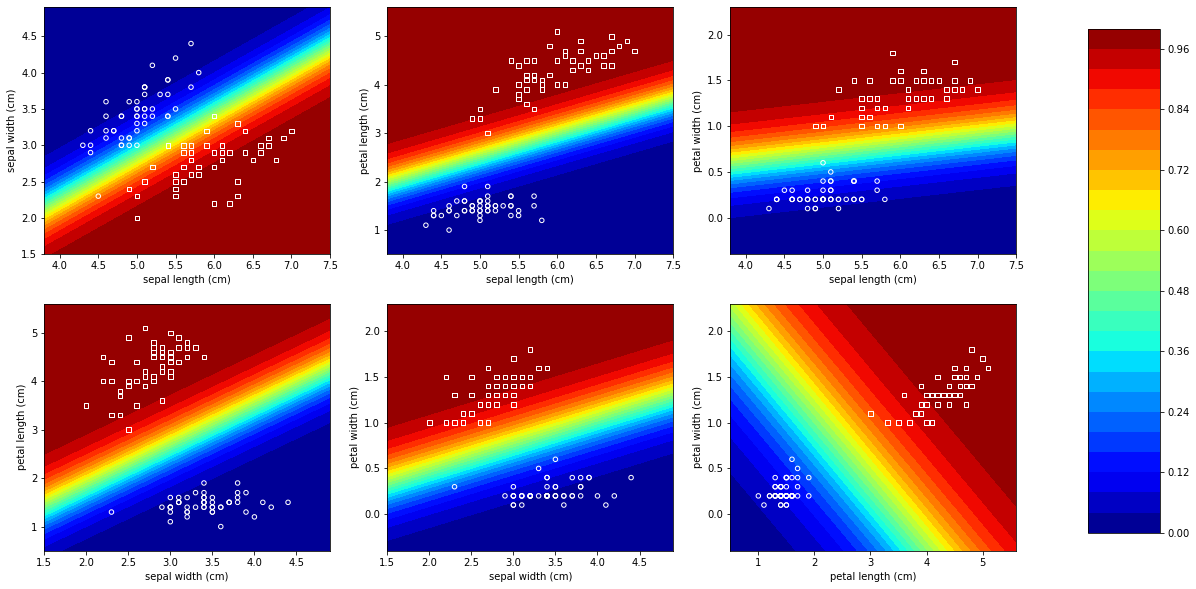

In [14]:
iris = load_iris() 
fig, ax = plt.subplots(2,3, figsize=(20,10))
ax = ax.flatten()
combs = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]
for i in range(len(combs)):
    class_filter = np.logical_or(iris.target == 0, iris.target == 1)
    X = iris.data[class_filter][:,combs[i]]
    y = iris.target[class_filter]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

    x_g = np.linspace(np.min(X[:, 0])-0.5, np.max(X[:, 0])+0.5, 100)
    y_g = np.linspace(np.min(X[:, 1])-0.5, np.max(X[:, 1])+0.5, 100)
    X_grid, Y_grid = np.meshgrid(x_g, y_g, indexing='ij') 

    beta=1
    p2 = LogisticRegression(max_iters=100, eta=0.01)
    p2.set_trainData(X_train, y_train)
    w2= p2.fit(beta=beta, threshold=None).weights()

    a = X_grid*p2.weights()[1] +  Y_grid*p2.weights()[2] + p2.weights()[0]
    z= 1 / (1 + np.exp(-beta * a)) 

    contour = ax[i].contourf(X_grid,Y_grid, z, 30, cmap='jet')

    # Define marker and color for each class
    markers = ['o', 's']  # Marker types for classes 0 and 1

    ax[i].scatter(X[y == 0, 0], X[y == 0, 1], marker=markers[0], s=20, facecolors='none', edgecolors='w')
    ax[i].scatter(X[y == 1, 0], X[y == 1, 1], marker=markers[1], s=20, facecolors='none', edgecolors='w') 
    
    ax[i].set_xlim(np.min(X[:, 0])-0.5, np.max(X[:, 0])+0.5)
    ax[i].set_ylim(np.min(X[:, 1])-0.5, np.max(X[:, 1])+0.5)
    ax[i].set_xlabel(iris.feature_names[combs[i][0]])
    ax[i].set_ylabel(iris.feature_names[combs[i][1]]) 

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(contour, cax=cbar_ax)
plt.savefig('dataset3_logreg.png')

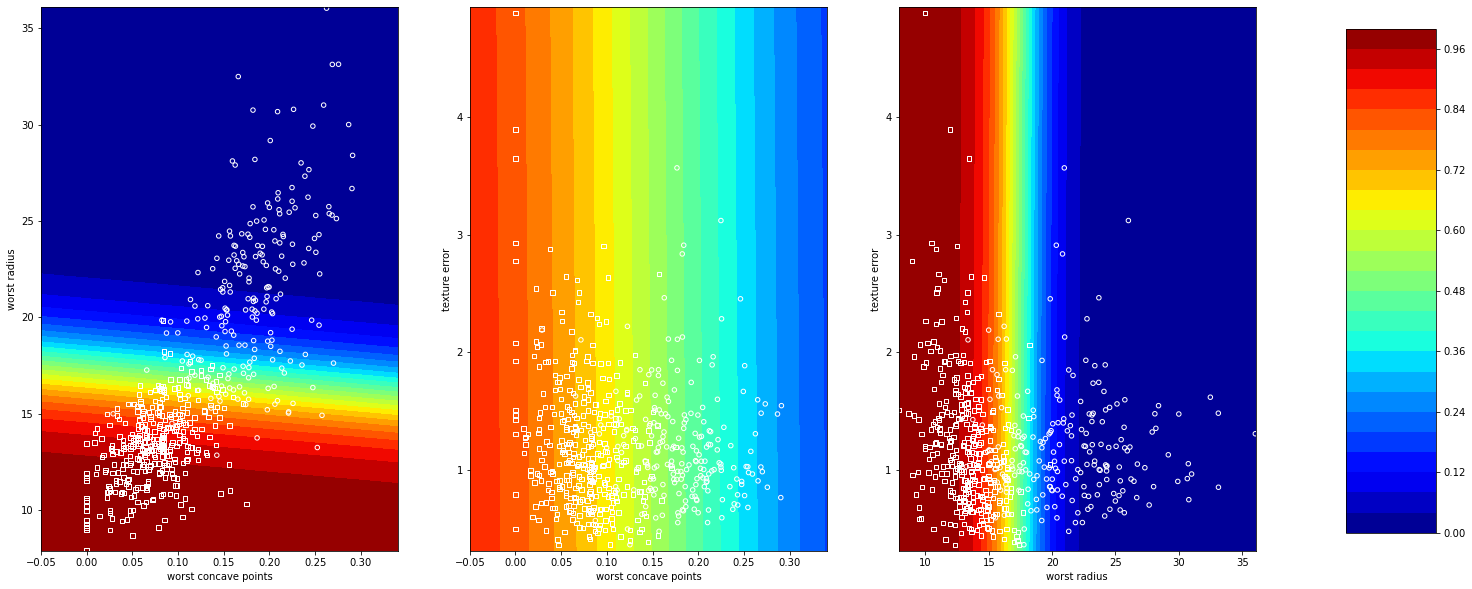

In [15]:
from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer()
fig, ax = plt.subplots(1,3, figsize=(25,10))
ax = ax.flatten()
combs = [-3, -10, -19]
combs = [[-3, -10], [-3,-19], [-10,-19]]
for i in range(len(combs)):
    X,y = cancer.data[:, combs[i]], cancer.target 

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

    x_g = np.linspace(np.min(X[:, 0])-0.5, np.max(X[:, 0])+0.5, 100)
    y_g = np.linspace(np.min(X[:, 1])-0.5, np.max(X[:, 1])+0.5, 100)
    X_grid, Y_grid = np.meshgrid(x_g, y_g, indexing='ij') 

    beta=1
    p2 = LogisticRegression(max_iters=100, eta=0.01)
    p2.set_trainData(X_train, y_train)
    w2= p2.fit(beta=beta, threshold=None).weights()

    a = X_grid*p2.weights()[1] +  Y_grid*p2.weights()[2] + p2.weights()[0]
    z= 1 / (1 + np.exp(-beta * a)) 

    contour = ax[i].contourf(X_grid,Y_grid, z, 30, cmap='jet')

    # Define marker and color for each class
    markers = ['o', 's']  # Marker types for classes 0 and 1

    ax[i].scatter(X[y == 0, 0], X[y == 0, 1], marker=markers[0], s=20, facecolors='none', edgecolors='w')
    ax[i].scatter(X[y == 1, 0], X[y == 1, 1], marker=markers[1], s=20, facecolors='none', edgecolors='w') 
    
    ax[i].set_xlim(np.min(X[:, 0])-0.05, np.max(X[:, 0])+0.05)
    ax[i].set_ylim(np.min(X[:, 1])-0.05, np.max(X[:, 1])+0.05)
    ax[i].set_xlabel(cancer.feature_names[combs[i][0]])
    ax[i].set_ylabel(cancer.feature_names[combs[i][1]]) 
    
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(contour, cax=cbar_ax)
plt.savefig('dataset2_logreg.png')